In [ ]:
import os
import pyfas as pfs
import pandas as pd
import matplotlib.pyplot as plt

class OLGAHRPlotter:
    def __init__(self, parametric_study_fpath: str):
        self._parametric_study_fpath = parametric_study_fpath
        self._all_tpls = self._find_all_tpls()
        self._data = {}
        self._parse_data_from_tpls()

    def _find_all_tpls(self) -> list:
        '''Метод для поиска всех .tpl в папке parametric_study_fpath '''
        tpl_extension = ".tpl"

        return [file for file in os.listdir(self._parametric_study_fpath) if file.endswith(tpl_extension)]

    def _parse_data_from_tpls(self, cases: str|list = 'all'):
        if cases == 'all':
            for case in self._all_tpls:
                tpl_file = pfs.Tpl(self._parametric_study_fpath + '/' + case)
                tpl_file.extract(3,32, 36, 41)

                df = pd.DataFrame({'QLST': tpl_file.data[41],
                                'Head': tpl_file.data[36],
                                'betta': tpl_file.data[3],
                                'dP': tpl_file.data[32]})
                df['QLST'] = df['QLST'] * 86400

                filtered_df = df[(df['QLST'] > 5) & (df['dP'] > 0)]
                filtered_df = filtered_df[filtered_df.index < 19000]
                filtered_df['Head'] = filtered_df['Head'].round(2)
                filtered_df['QLST'] = filtered_df['QLST'].round(2)
                filtered_df['betta'] = filtered_df['betta'].round(2)
                filtered_df['dP'] = filtered_df['dP'] / 10 ** 5

                filtered_df = filtered_df.sort_values('QLST', ascending=False)
                
                self._data[case] = filtered_df
        else:
            for case in cases:
                tpl_file = pfs.Tpl(self._parametric_study_fpath + '/' + case)
                tpl_file.extract(3,32, 36, 41)

                df = pd.DataFrame({'QLST': tpl_file.data[41],
                                'Head': tpl_file.data[36],
                                'betta': tpl_file.data[3],
                                'dP': tpl_file.data[32]})
                df['QLST'] = df['QLST'] * 86400

                filtered_df = df[(df['QLST'] > 5) & (df['dP'] > 0)]
                filtered_df = filtered_df[filtered_df.index < 19000]
                filtered_df['Head'] = filtered_df['Head'].round(2)
                filtered_df['QLST'] = filtered_df['QLST'].round(2)
                filtered_df['bett a'] = filtered_df['betta'].round(2)
                filtered_df['dP'] = filtered_df['dP'] / 10 ** 5

                filtered_df = filtered_df.sort_values('QLST', ascending=False)
                
                self._data[case] = filtered_df


    def plot(self, variable : str = 'dP'):
        for case_name, df in self._data.items():
            plt.plot(df['QLST'], df[variable], label=case_name)
            plt.legend()
            plt.xlabel('Qliq, m3/d')
            plt.ylabel(str(variable))

In [19]:
esp_plotter = OLGAHRPlotter('pressure_driven_source_ESP_Study[1]')


In [20]:
esp_plotter._all_tpls

['(V1)70,(V2)0.tpl',
 '(V1)70,(V2)2.tpl',
 '(V1)70,(V2)3.tpl',
 '(V1)70,(V2)5.tpl',
 '(V1)70,(V2)7.tpl']

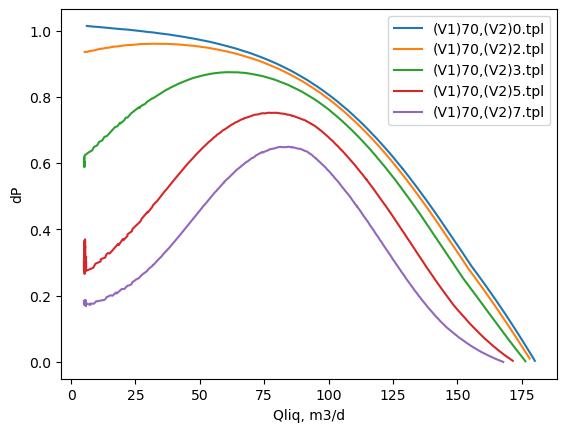

In [21]:
esp_plotter.plot(variable='dP')